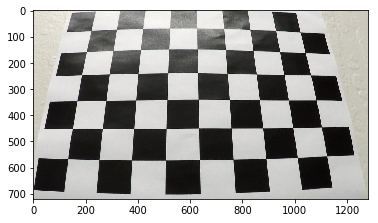

In [1]:
import numpy as np
import cv2
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Read in a calibration image
img = mpimg.imread('./camera_cal/calibration3.jpg')
plt.imshow(img)


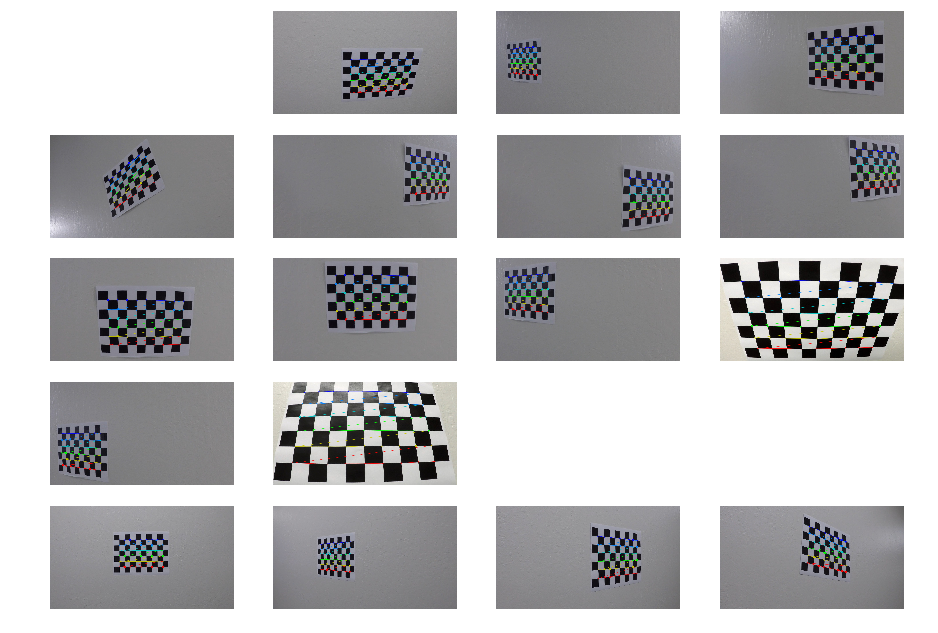

In [2]:
import glob

# Read in and make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(9,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# draw the calibrtion images
fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i, fname in enumerate(images):
    #read in each image
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # plt.imshow(gray)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # Debug use
    # print(ret)
    # print(i)
    # print(fname)
    
    axs[i].axis('off')
    # If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
    
        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        axs[i].imshow(img)
    

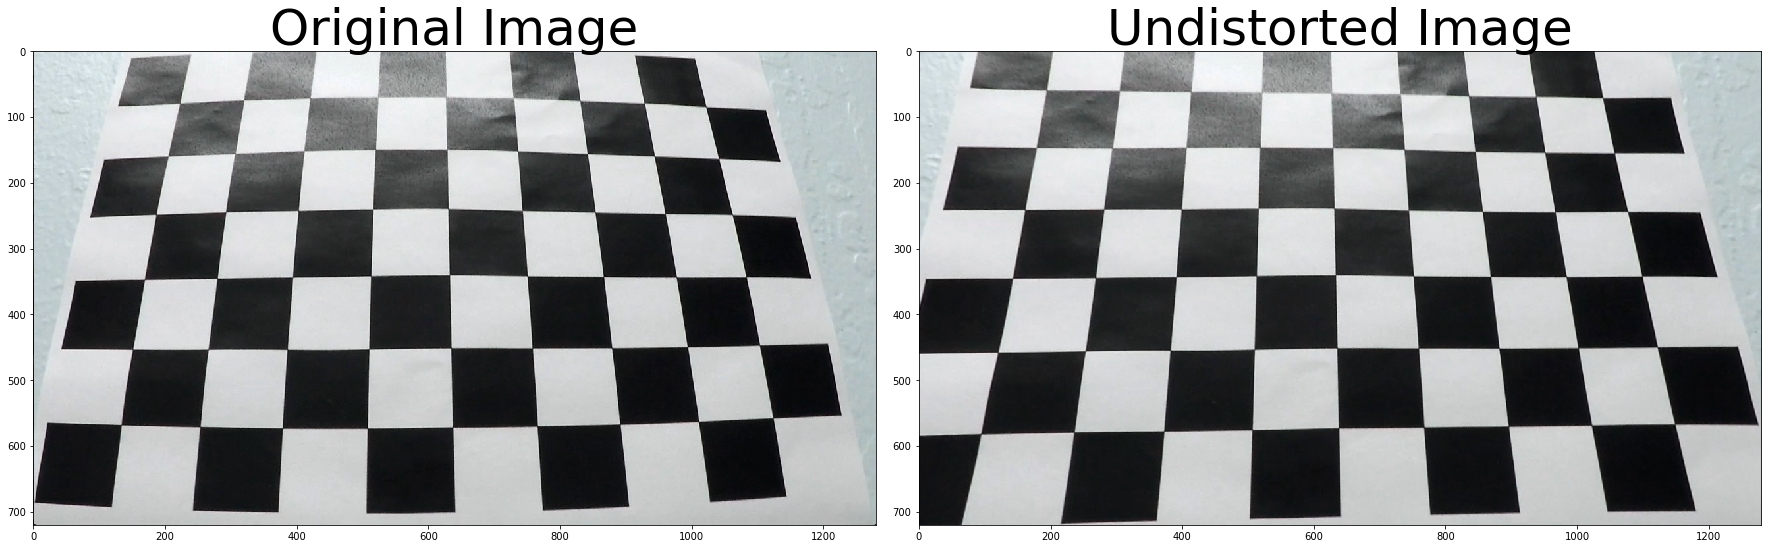

In [3]:
# Read in a test image
img = cv2.imread('./camera_cal/calibration3.jpg')

# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    # img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist, mtx, dist

undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


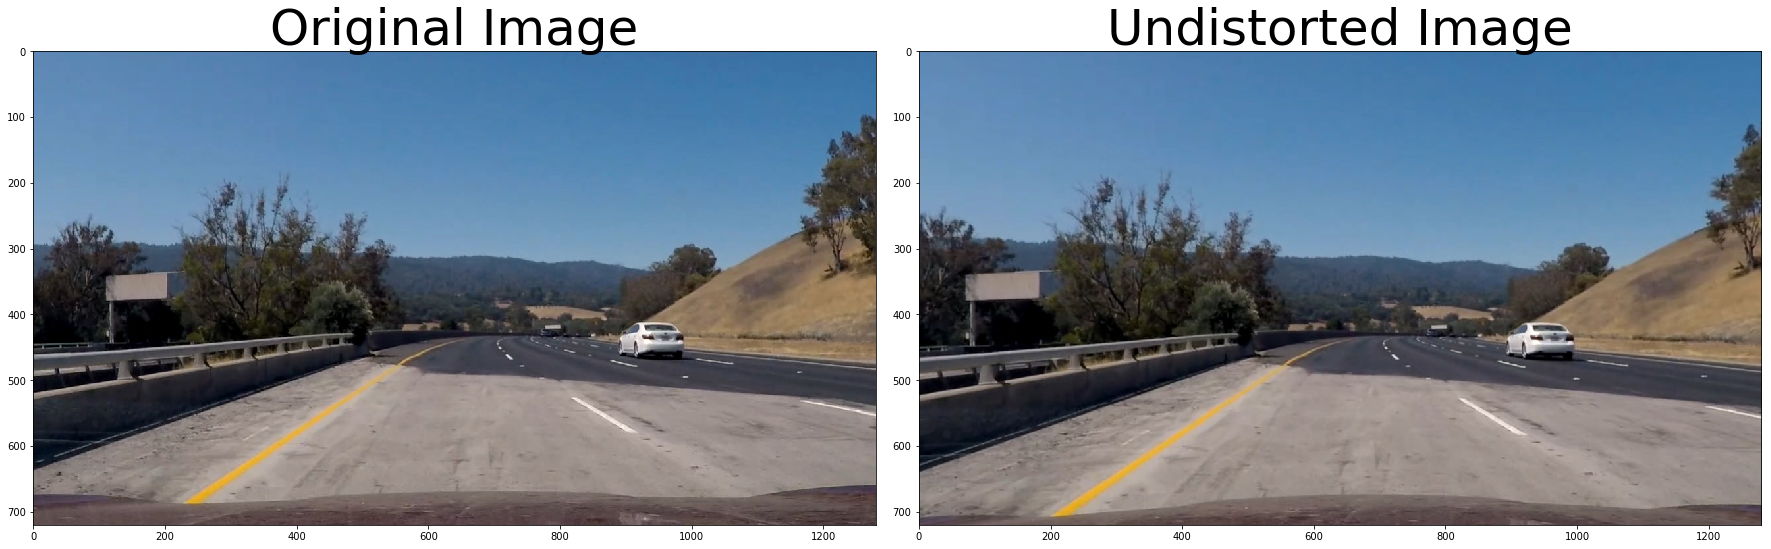

In [4]:
# an example of a distortion-corrected image.
img = mpimg.imread('./test_images/problem06.jpg')
undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


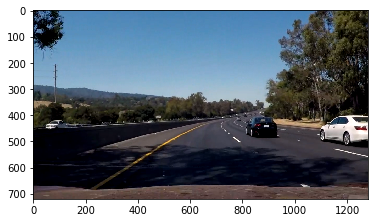

In [5]:
# Read in a test image
img = mpimg.imread('./test_images/problem09.jpg')
plt.imshow(img)

Image Size:
(1280, 720)
Source:
[[  580.           460.        ]
 [  198.33332825   720.        ]
 [ 1111.66662598   720.        ]
 [  705.           460.        ]]
Destination:
[[ 320.    0.]
 [ 320.  720.]
 [ 960.  720.]
 [ 960.    0.]]


Text(0.5,1,'Warped Image')

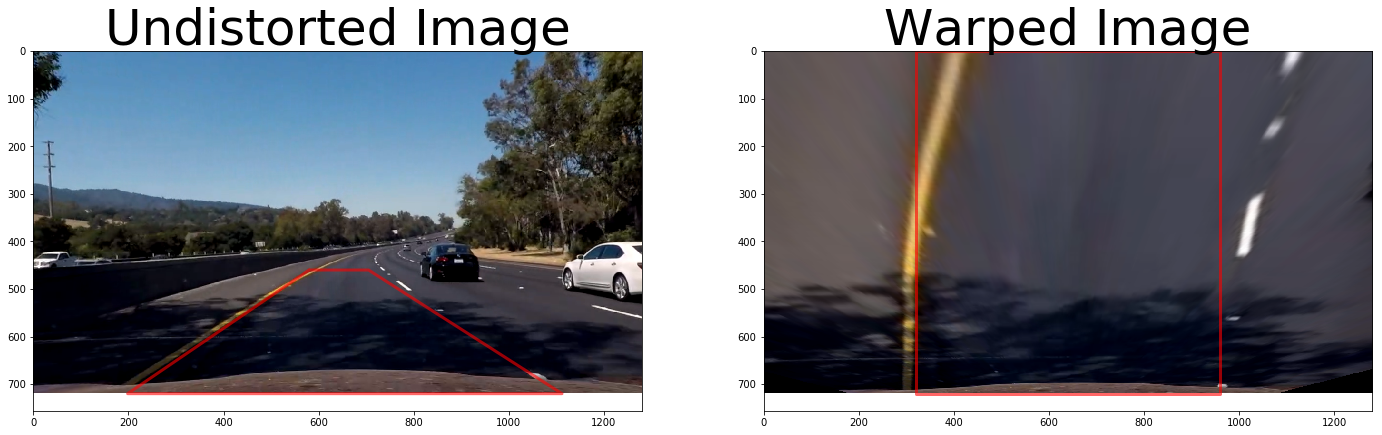

In [6]:

# Define prespective tranform function

def warp(img):
    
    # Define calibration box
    
    img_size = (img.shape[1],img.shape[0])
    

    #src = np.float32(
    #[[(img_size[0] / 2) - 90, img_size[1] / 2 + 100],
    #[((img_size[0] / 6) - 15), img_size[1]],
    #[(img_size[0] * 5 / 6) + 45, img_size[1]],
    #[(img_size[0] / 2 + 65), img_size[1] / 2 + 100]])
    
    #dst = np.float32(
    #[[(img_size[0] / 4), 0],
    #[(img_size[0] / 4), img_size[1]],
    #[(img_size[0] * 3 / 4), img_size[1]],
    #[(img_size[0] * 3 / 4), 0]])
    
    
    #print('Image Size:')
    #print(img_size)
    #print('Source:')
    #print(src)
    #print('Destination:')
    #print(dst)
    
    # Compute the perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Compute the inverse perspective transform
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Warp an image using the perspective transform, M
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped, src, dst, Minv

img_size = (img.shape[1],img.shape[0])
src = np.float32(
    [[(img_size[0] / 2) - 60, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 15), img_size[1]],
    [(img_size[0] * 5 / 6) + 45, img_size[1]],
    [(img_size[0] / 2 + 65), img_size[1] / 2 + 100]])
    
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    
print('Image Size:')
print(img_size)
print('Source:')
print(src)
print('Destination:')
print(dst)
    
# Get prespective transform
undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)
warped_im, src, dst, Minv = warp(undistorted)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(undistorted)
x = [src[0][0],src[1][0],src[2][0],src[3][0],src[0][0]]
y = [src[0][1],src[1][1],src[2][1],src[3][1],src[0][1]]
ax1.plot(x, y, color='#FF0000', alpha=0.6, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(warped_im)
x = [dst[0][0],dst[1][0],dst[2][0],dst[3][0],dst[0][0]]
y = [dst[0][1],dst[1][1],dst[2][1],dst[3][1],dst[0][1]]
ax2.plot(x, y, color='#FF0000', alpha=0.6, linewidth=3, solid_capstyle='round', zorder=2)
ax2.set_title('Warped Image', fontsize=50)


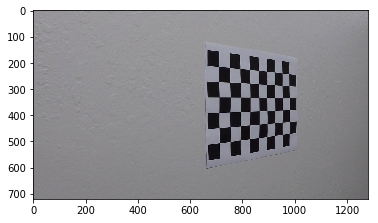

In [7]:
# Check with Checker image
img = mpimg.imread('./camera_cal/calibration8.jpg')
plt.imshow(img)

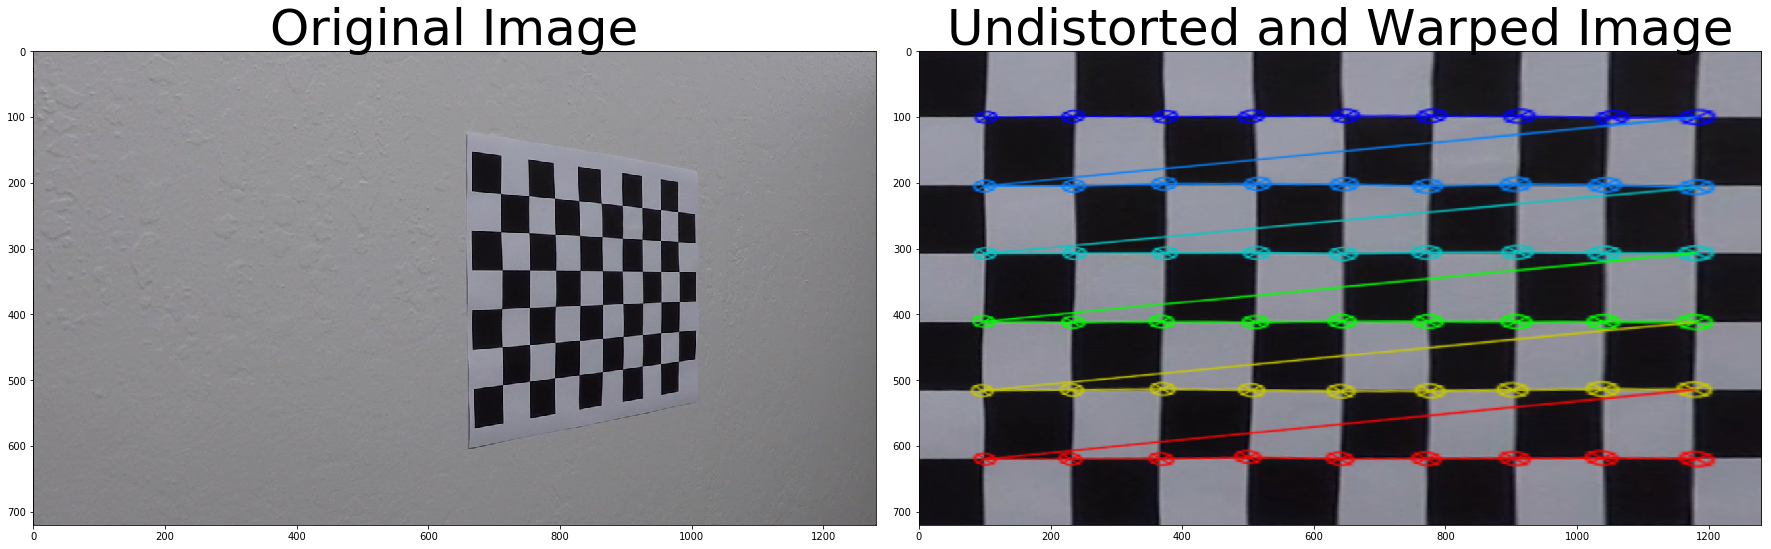

In [8]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

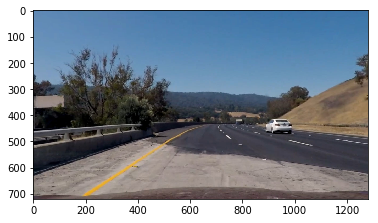

In [9]:
img = mpimg.imread('./test_images/problem07.jpg') #('./test_images/test2.jpg')
undistorted, mtx, dist = cal_undistort(img, objpoints, imgpoints)
plt.imshow(undistorted)

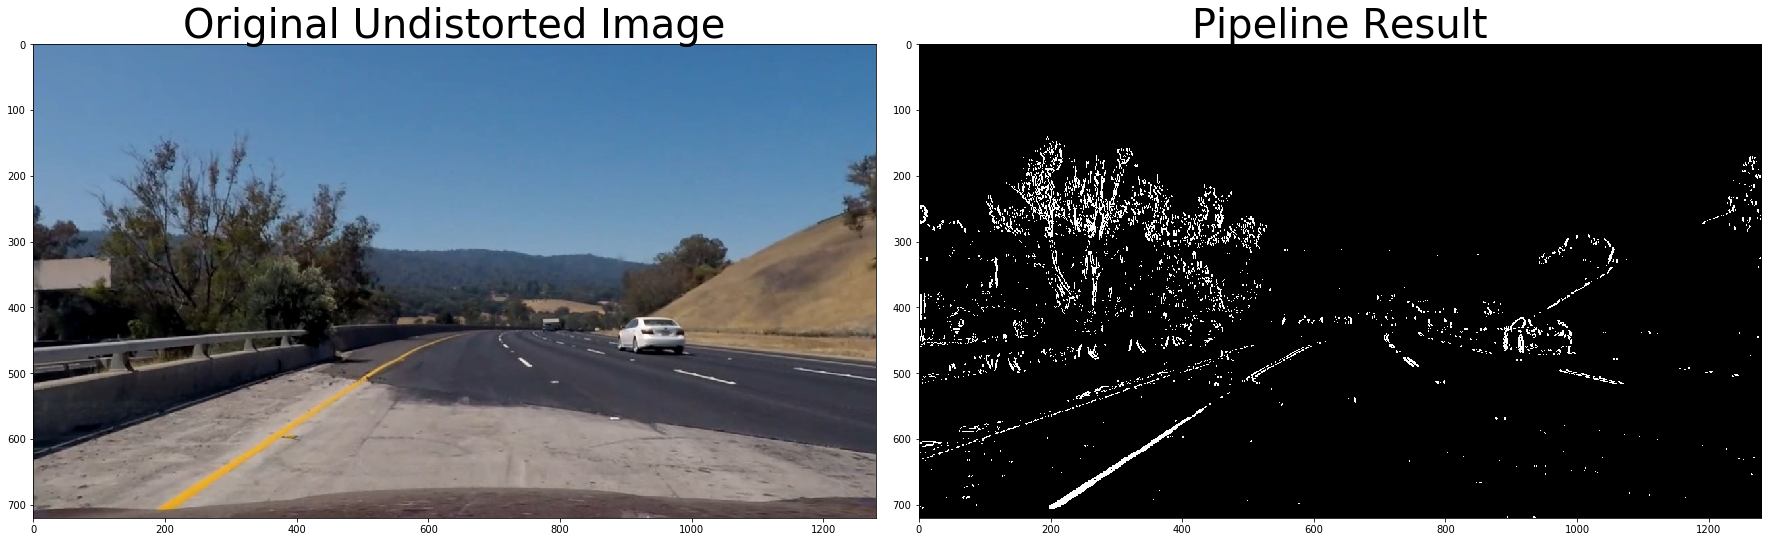

In [10]:
# Color and Gradient Pipline

def color_grad_pipeline(img, s_thresh=(170, 220), sx_thresh=(30, 240)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]

    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return combined_binary
    
result = color_grad_pipeline(undistorted)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undistorted)
ax1.set_title('Original Undistorted Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

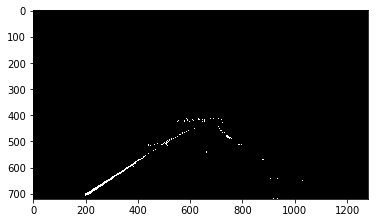

In [11]:
def region_of_center(img):
    width = img.shape[1]
    height = img.shape[0]
    vertices = np.array([[(width*0.5, height*0.5),
                        (width*0.5, height*0.5),
                        (width*0.90, height),
                        (width*0.1, height)]], 
                        dtype=np.int32)
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image_right = cv2.bitwise_and(img, mask)
    return masked_image_right

masked = region_of_center(result)
plt.imshow(masked, cmap='gray')

Text(0.5,1,'Warped Image')

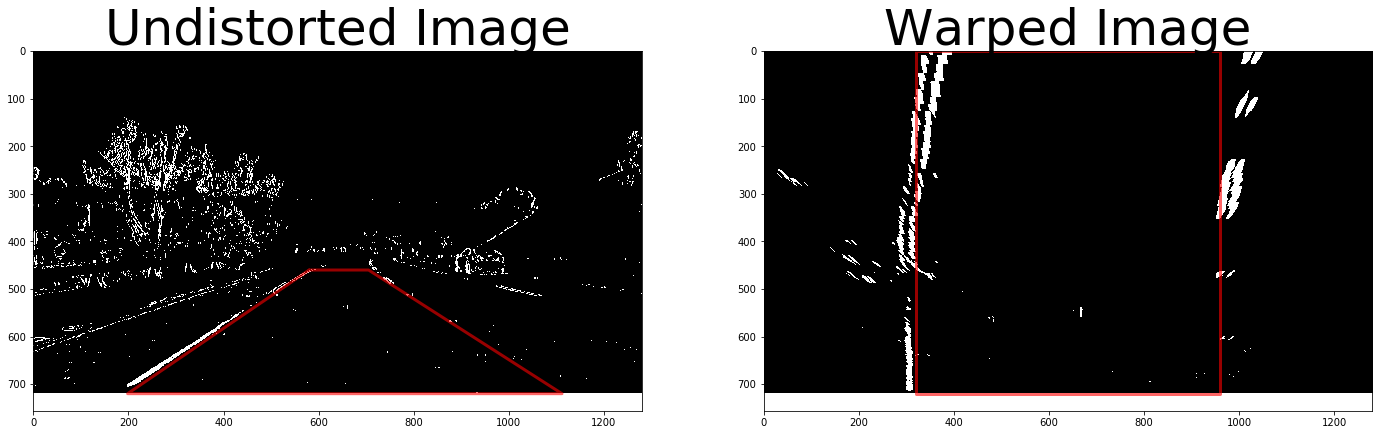

In [12]:
warped_im, src, dst, Minv = warp(masked)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(result, cmap='gray')
x = [src[0][0],src[1][0],src[2][0],src[3][0],src[0][0]]
y = [src[0][1],src[1][1],src[2][1],src[3][1],src[0][1]]
ax1.plot(x, y, color='#FF0000', alpha=0.6, linewidth=3, solid_capstyle='round', zorder=2)
ax1.set_title('Undistorted Image', fontsize=50)
ax2.imshow(warped_im, cmap='gray')
x = [dst[0][0],dst[1][0],dst[2][0],dst[3][0],dst[0][0]]
y = [dst[0][1],dst[1][1],dst[2][1],dst[3][1],dst[0][1]]
ax2.plot(x, y, color='#FF0000', alpha=0.6, linewidth=3, solid_capstyle='round', zorder=2)
ax2.set_title('Warped Image', fontsize=50)

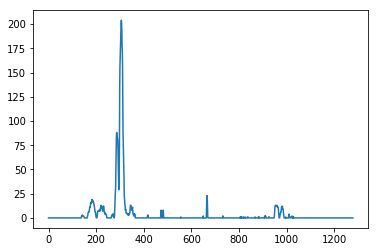

In [13]:
histogram = np.sum(warped_im[warped_im.shape[0]//2:,:], axis=0)
plt.plot(histogram)

(720, 0)

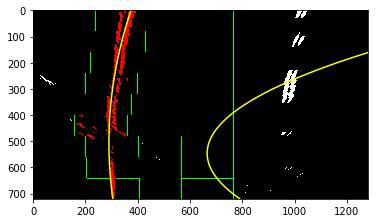

In [14]:
def slide_window_fit(binary_warped):

    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    return out_img, left_fit, right_fit, left_fitx, right_fitx, ploty

out_img, left_fit, right_fit, left_fitx, right_fitx, ploty =  slide_window_fit(warped_im)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

left_fit:
[  3.30771904e-04  -3.33909893e-01   3.74149360e+02]
right_fit:
[  4.13856299e-03  -4.52132024e+00   1.90033910e+03]
0.0738522987284
13.540539932


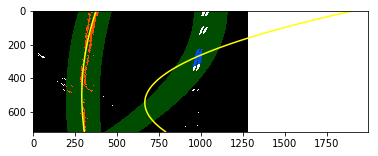

In [15]:
def poly_fit(binary_warped, left_fit, right_fit): 
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    return result

result = poly_fit(warped_im, left_fit, right_fit)

plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

print("left_fit:")
print(left_fit)
print("right_fit:")
print(right_fit)
print(left_fit[1]/right_fit[1])
print(right_fit[1]/left_fit[1])

In [16]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

1557.39684521 641.858348539


In [17]:
def calc_curvrad(binary_warped, left_fit, right_fit): 
    # Define conversions in x and y from pixels space to meters
    ym_per_pix =  30.0/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
   
    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters

    if right_fit is not None and left_fit is not None:
            car_pos = binary_warped.shape[1]/2
            h = binary_warped.shape[0]
            left_fit_x_int = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
            right_fit_x_int = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]
            lane_center_position = (right_fit_x_int + left_fit_x_int) /2
            center_dist = (car_pos - lane_center_position) * xm_per_pix
    return left_curverad, right_curverad, center_dist

left_curverad, right_curverad, center_dist = calc_curvrad(warped_im, left_fit, right_fit)
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m
print(center_dist, 'm')




609.403924276 m 166.06617323 m
0.487274218065 m


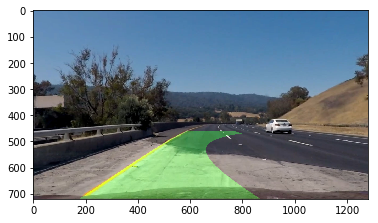

In [18]:
def draw_lane(undistorted, warped_im, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_im).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    image = undistorted
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
    
    return result

result = draw_lane(undistorted, warped_im, left_fitx, right_fitx, ploty)
plt.imshow(result)


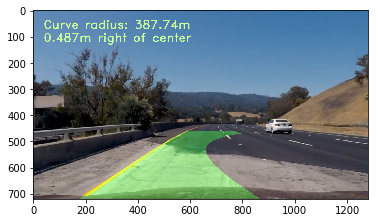

In [19]:
def draw_data(original_img, curv_rad, center_dist):
    new_img = np.copy(original_img)
    h = new_img.shape[0]
    font = cv2.FONT_HERSHEY_DUPLEX
    text = 'Curve radius: ' + '{:04.2f}'.format(curv_rad) + 'm'
    cv2.putText(new_img, text, (40,70), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    abs_center_dist = abs(center_dist)
    text = '{:04.3f}'.format(abs_center_dist) + 'm ' + direction + ' of center'
    cv2.putText(new_img, text, (40,120), font, 1.5, (200,255,155), 2, cv2.LINE_AA)
    return new_img

result = draw_data(result, (left_curverad + right_curverad)/2, center_dist)
plt.imshow(result)

In [20]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

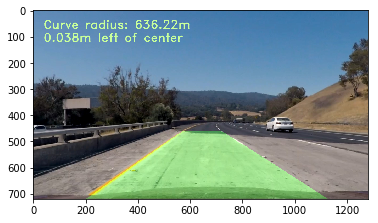

In [22]:
from functools import reduce

def process_image(img):
    new_img = np.copy(img)
    
    undistorted, mtx, dist = cal_undistort(new_img, objpoints, imgpoints)
    grad_im = color_grad_pipeline(undistorted)
    masked_im = region_of_center(grad_im)
    warped_im, src, dst, Minv = warp(masked_im)
    
    
    slide_im, left_fit, right_fit, left_fitx, right_fitx, ploty =  slide_window_fit(warped_im)

    #print("before")
    #print(left_fit)
    #print(right_fit)
    #print(left_fit[1] / right_fit[1])
    
    # Average with last frame
    if (leftLine.current_fit[0]):
        
        # Sanity Checks
        # Check curvature and direction
        if ((left_fit[0] > 0) and (right_fit[0] < 0)) or \
            ((left_fit[0] < 0) and (right_fit[0] > 0)) or \
            ((left_fit[1] / right_fit[1]) > 10) or \
            ((right_fit[1] / left_fit[1]) > 10):  
            # not match
            left_fitx = leftLine.recent_xfitted
            right_fitx = rightLine.recent_xfitted
            left_fit = leftLine.current_fit
            right_fit = rightLine.current_fit
        else:
            # average with previous
            left_fit = (left_fit + leftLine.current_fit)/2
            right_fit = (right_fit + rightLine.current_fit)/2
    
    #print("after")
    #print(left_fit)
    #print(right_fit)
    #print(left_fit[1] / right_fit[1])
    
    left_curverad, right_curverad, center_dist = calc_curvrad(slide_im, left_fit, right_fit)
    
    
    leftLine.radius_of_curvature = left_curverad
    rightLine.radius_of_curvature = right_curverad
    leftLine.recent_xfitted = left_fitx
    rightLine.recent_xfitted = right_fitx
    leftLine.current_fit = left_fit
    rightLine.current_fit = right_fit
    #print(left_curverad)
    #print(right_curverad)
    
    land_im = draw_lane(undistorted, warped_im, left_fitx, right_fitx, ploty)
    img_out = draw_data(land_im, (left_curverad + right_curverad)/2, center_dist)
        
    return img_out

img = mpimg.imread('./test_images/problem01.jpg')
leftLine = Line()
rightLine = Line()
result = process_image(img)
plt.imshow(result)

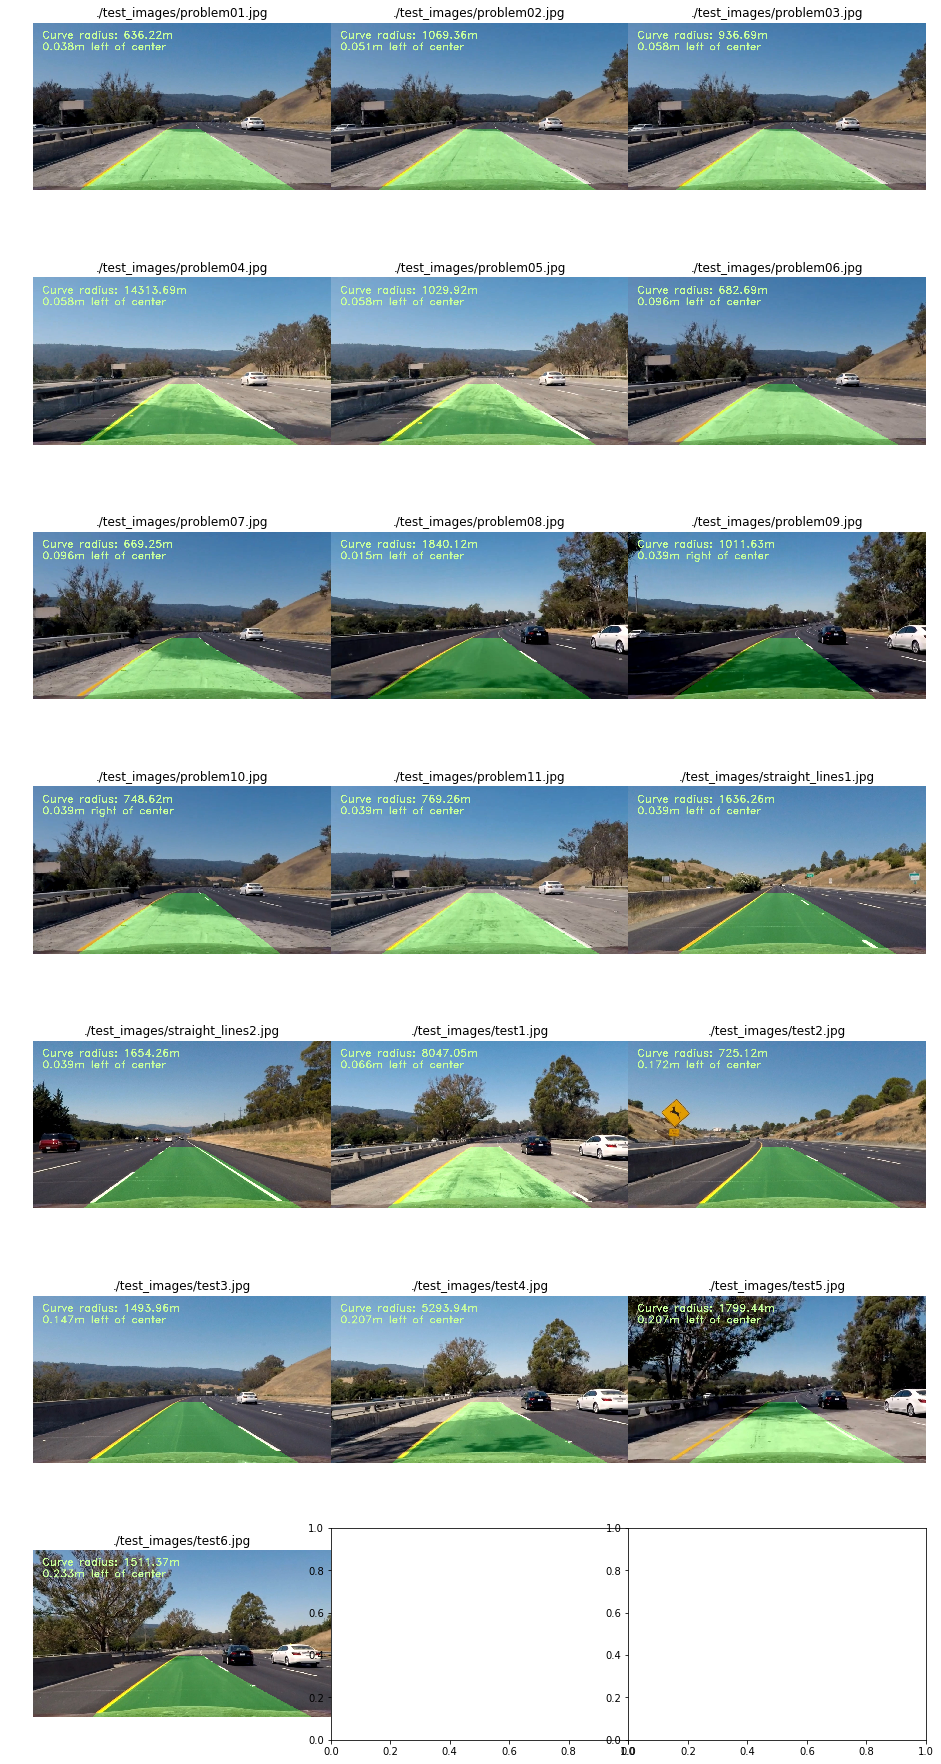

In [23]:
images = glob.glob('./test_images/*.jpg')


# draw the test images
fig, axs = plt.subplots(7,3, figsize=(16, 32))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i, fname in enumerate(images):
    #read in each image
    img = mpimg.imread(fname)
    
    result = process_image(img)
    
    axs[i].axis('off')
    axs[i].set_title(fname)
    axs[i].imshow(result)

In [24]:
leftLine = Line()
rightLine = Line()

video_output1 = 'project_video_22_26_output.mp4'
video_input1 = VideoFileClip('project_video.mp4').subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_22_26_output.mp4
[MoviePy] Writing video project_video_22_26_output.mp4


 99%|█████████▉| 100/101 [01:25<00:00,  1.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_22_26_output.mp4 

CPU times: user 1min 26s, sys: 4.32 s, total: 1min 30s
Wall time: 1min 26s


In [25]:
leftLine = Line()
rightLine = Line()

video_output1 = 'project_video_35_50_output.mp4'
video_input1 = VideoFileClip('project_video.mp4').subclip(41,43)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_35_50_output.mp4
[MoviePy] Writing video project_video_35_50_output.mp4


 98%|█████████▊| 50/51 [00:44<00:00,  1.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_35_50_output.mp4 

CPU times: user 43.9 s, sys: 2.59 s, total: 46.5 s
Wall time: 45.2 s


In [26]:
leftLine = Line()
rightLine = Line()

video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(38,44)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [17:49<00:00,  1.18it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 17min 53s, sys: 56.6 s, total: 18min 50s
Wall time: 17min 50s
